# <u> Linear regression 

Regression is useful when you want to forecast a response using a new set of predictors. For example, you could try to predict electricity consumption of a household for the next hour given the outdoor temperature, time of day, and number of residents in that household.

Regression is used in many different fields, including economics, computer science, and the social sciences. Its importance rises every day with the availability of large amounts of data and increased awareness of the practical value of data.

Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. One of its main advantages is the ease of interpreting results.

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
# we open and read the merge table of all indicators
silver_dataset = pd.read_csv ('./data/GoldenDataFrameWithoutCluster.csv')
silver_dataset = silver_dataset.drop(silver_dataset.columns[0], axis = 1)
silver_dataset = silver_dataset.drop(silver_dataset.columns[0], axis = 1)
silver_dataset = silver_dataset.dropna()
silver_dataset

,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
0,NOR,1831,0.000114,0.217868,5.892337e-07,0.147095,0.483624,0.096871
1,NOR,1832,0.000114,0.217868,5.182407e-07,0.147095,0.483624,0.096871
2,NOR,1833,0.000114,0.217868,5.602877e-07,0.147095,0.483624,0.096871
3,NOR,1834,0.000114,0.217868,6.143394e-07,0.147095,0.483624,0.096871
4,NOR,1835,0.000114,0.217868,6.790523e-07,0.147095,0.483624,0.096871
...,...,...,...,...,...,...,...,...
20570,HRV,2017,0.000015,0.083368,3.257590e-03,0.144623,0.887248,0.367510
20571,HRV,2018,0.000014,0.088788,3.257590e-03,0.138443,0.889933,0.367510
20572,HRV,2019,0.000014,0.088998,3.257590e-03,0.131026,0.895302,0.367510
20573,HRV,2020,0.000013,0.088308,3.257590e-03,0.101360,0.885906,0.367510


In [124]:
# we select a country
silver_dataset = silver_dataset[silver_dataset.Code == 'AFG']
silver_dataset

,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
19064,AFG,1950,0.012906,0.801027,0.000009,0.908529,0.210738,0.035952
19065,AFG,1951,0.012906,0.802407,0.000009,0.908529,0.214765,0.035952
19066,AFG,1952,0.012906,0.802469,0.000009,0.908529,0.220134,0.035952
19067,AFG,1953,0.012906,0.803220,0.000009,0.908529,0.226846,0.035952
19068,AFG,1954,0.012906,0.801742,0.000009,0.908529,0.230872,0.035952
...,...,...,...,...,...,...,...,...
19131,AFG,2017,0.006147,0.736124,0.000520,0.822002,0.684564,0.121505
19132,AFG,2018,0.005936,0.736124,0.000520,0.813350,0.685906,0.121505
19133,AFG,2019,0.005750,0.736124,0.000520,0.805933,0.692617,0.121505
19134,AFG,2020,0.005565,0.736124,0.000520,0.817058,0.679195,0.121505


In [125]:
# we select an indicator 
x = silver_dataset['Year'].values.reshape((-1, 1))
y = silver_dataset['Deaths'].values

# we do the linear regression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [126]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.8436320694716677
intercept: 0.22365128279415655
slope: [-0.00010731]


In [127]:
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")
print(f"slope: {new_model.coef_}")

intercept: [0.22365128]
slope: [[-0.00010731]]


In [128]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[0.01440637 0.01429907 0.01419176 0.01408446 0.01397715 0.01386985
 0.01376254 0.01365524 0.01354793 0.01344063 0.01333332 0.01322602
 0.01311871 0.01301141 0.0129041  0.0127968  0.01268949 0.01258219
 0.01247488 0.01236758 0.01226027 0.01215297 0.01204566 0.01193836
 0.01183105 0.01172375 0.01161644 0.01150914 0.01140183 0.01129453
 0.01118722 0.01107992 0.01097261 0.01086531 0.010758   0.0106507
 0.01054339 0.01043609 0.01032878 0.01022148 0.01011417 0.01000687
 0.00989956 0.00979226 0.00968495 0.00957765 0.00947034 0.00936304
 0.00925573 0.00914843 0.00904112 0.00893382 0.00882651 0.00871921
 0.0086119  0.0085046  0.00839729 0.00828999 0.00818268 0.00807538
 0.00796807 0.00786076 0.00775346 0.00764615 0.00753885 0.00743154
 0.00732424 0.00721693 0.00710963 0.00700232 0.00689502 0.00678771]


In [129]:
y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")

predicted response:
[[0.01440637]
 [0.01429907]
 [0.01419176]
 [0.01408446]
 [0.01397715]
 [0.01386985]
 [0.01376254]
 [0.01365524]
 [0.01354793]
 [0.01344063]
 [0.01333332]
 [0.01322602]
 [0.01311871]
 [0.01301141]
 [0.0129041 ]
 [0.0127968 ]
 [0.01268949]
 [0.01258219]
 [0.01247488]
 [0.01236758]
 [0.01226027]
 [0.01215297]
 [0.01204566]
 [0.01193836]
 [0.01183105]
 [0.01172375]
 [0.01161644]
 [0.01150914]
 [0.01140183]
 [0.01129453]
 [0.01118722]
 [0.01107992]
 [0.01097261]
 [0.01086531]
 [0.010758  ]
 [0.0106507 ]
 [0.01054339]
 [0.01043609]
 [0.01032878]
 [0.01022148]
 [0.01011417]
 [0.01000687]
 [0.00989956]
 [0.00979226]
 [0.00968495]
 [0.00957765]
 [0.00947034]
 [0.00936304]
 [0.00925573]
 [0.00914843]
 [0.00904112]
 [0.00893382]
 [0.00882651]
 [0.00871921]
 [0.0086119 ]
 [0.0085046 ]
 [0.00839729]
 [0.00828999]
 [0.00818268]
 [0.00807538]
 [0.00796807]
 [0.00786076]
 [0.00775346]
 [0.00764615]
 [0.00753885]
 [0.00743154]
 [0.00732424]
 [0.00721693]
 [0.00710963]
 [0.00700232]


## Predictions 

In [131]:
# we generate the years until  2050
future_years = np.arange(2020, 2051, 1).reshape((-1, 1))

# we predict the values for the future years
future_predictions = model.predict(future_years)

# we create a dataframe for teh future years and their predictions 
future_data = {'Years': future_years.flatten(),
               'predictions': future_predictions}
future_df = pd.DataFrame(future_data)

print(future_df)


    Years  predictions
0    2020     0.006895
1    2021     0.006788
2    2022     0.006680
3    2023     0.006573
4    2024     0.006466
5    2025     0.006358
6    2026     0.006251
7    2027     0.006144
8    2028     0.006037
9    2029     0.005929
10   2030     0.005822
11   2031     0.005715
12   2032     0.005607
13   2033     0.005500
14   2034     0.005393
15   2035     0.005285
16   2036     0.005178
17   2037     0.005071
18   2038     0.004964
19   2039     0.004856
20   2040     0.004749
21   2041     0.004642
22   2042     0.004534
23   2043     0.004427
24   2044     0.004320
25   2045     0.004212
26   2046     0.004105
27   2047     0.003998
28   2048     0.003890
29   2049     0.003783
30   2050     0.003676


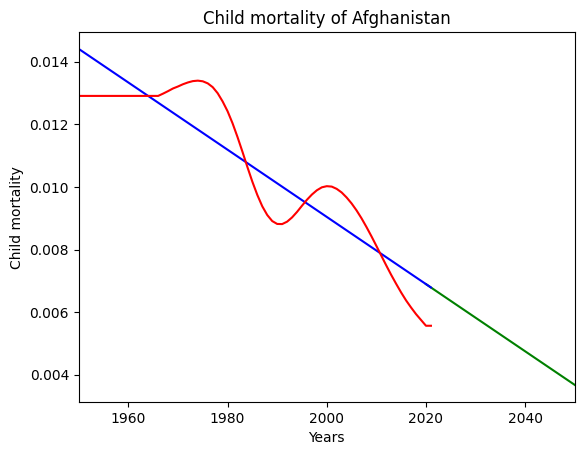

In [132]:

plt.plot(future_years.flatten(), future_predictions, color='green')
plt.plot(x, y_pred, color='blue')
plt.plot(x, y, color='red')

# we define the title and the labels of the axis 
plt.title('Child mortality of Afghanistan')
plt.xlabel('Years')
plt.ylabel('Child mortality')


plt.gca().set_xlim(1950,2050)

plt.show()

# <u> Second example with GDP

In [113]:
# we open and read the merge table of all indicators
silver_dataset = pd.read_csv ('./data/GoldenDataFrameWithoutCluster.csv')
silver_dataset = silver_dataset.drop(silver_dataset.columns[0], axis = 1)
silver_dataset = silver_dataset.drop(silver_dataset.columns[0], axis = 1)
silver_dataset = silver_dataset.dropna()
silver_dataset

,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
0,NOR,1831,0.000114,0.217868,5.892337e-07,0.147095,0.483624,0.096871
1,NOR,1832,0.000114,0.217868,5.182407e-07,0.147095,0.483624,0.096871
2,NOR,1833,0.000114,0.217868,5.602877e-07,0.147095,0.483624,0.096871
3,NOR,1834,0.000114,0.217868,6.143394e-07,0.147095,0.483624,0.096871
4,NOR,1835,0.000114,0.217868,6.790523e-07,0.147095,0.483624,0.096871
...,...,...,...,...,...,...,...,...
20570,HRV,2017,0.000015,0.083368,3.257590e-03,0.144623,0.887248,0.367510
20571,HRV,2018,0.000014,0.088788,3.257590e-03,0.138443,0.889933,0.367510
20572,HRV,2019,0.000014,0.088998,3.257590e-03,0.131026,0.895302,0.367510
20573,HRV,2020,0.000013,0.088308,3.257590e-03,0.101360,0.885906,0.367510


In [114]:
silver_dataset = silver_dataset[silver_dataset.Code == 'AFG']
silver_dataset

,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
19064,AFG,1950,0.012906,0.801027,0.000009,0.908529,0.210738,0.035952
19065,AFG,1951,0.012906,0.802407,0.000009,0.908529,0.214765,0.035952
19066,AFG,1952,0.012906,0.802469,0.000009,0.908529,0.220134,0.035952
19067,AFG,1953,0.012906,0.803220,0.000009,0.908529,0.226846,0.035952
19068,AFG,1954,0.012906,0.801742,0.000009,0.908529,0.230872,0.035952
...,...,...,...,...,...,...,...,...
19131,AFG,2017,0.006147,0.736124,0.000520,0.822002,0.684564,0.121505
19132,AFG,2018,0.005936,0.736124,0.000520,0.813350,0.685906,0.121505
19133,AFG,2019,0.005750,0.736124,0.000520,0.805933,0.692617,0.121505
19134,AFG,2020,0.005565,0.736124,0.000520,0.817058,0.679195,0.121505


In [115]:
x = silver_dataset['Year'].values.reshape((-1, 1))
y = silver_dataset['GDP '].values

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [116]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.8157281676739401
intercept: -0.015408208738872688
slope: [7.86004259e-06]


In [117]:
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")
print(f"slope: {new_model.coef_}")

intercept: [-0.01540821]
slope: [[7.86004259e-06]]


In [118]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[-8.11256949e-05 -7.32656523e-05 -6.54056097e-05 -5.75455672e-05
 -4.96855246e-05 -4.18254820e-05 -3.39654394e-05 -2.61053968e-05
 -1.82453542e-05 -1.03853116e-05 -2.52526904e-06  5.33477354e-06
  1.31948161e-05  2.10548587e-05  2.89149013e-05  3.67749439e-05
  4.46349865e-05  5.24950291e-05  6.03550716e-05  6.82151142e-05
  7.60751568e-05  8.39351994e-05  9.17952420e-05  9.96552846e-05
  1.07515327e-04  1.15375370e-04  1.23235412e-04  1.31095455e-04
  1.38955498e-04  1.46815540e-04  1.54675583e-04  1.62535625e-04
  1.70395668e-04  1.78255710e-04  1.86115753e-04  1.93975796e-04
  2.01835838e-04  2.09695881e-04  2.17555923e-04  2.25415966e-04
  2.33276009e-04  2.41136051e-04  2.48996094e-04  2.56856136e-04
  2.64716179e-04  2.72576221e-04  2.80436264e-04  2.88296307e-04
  2.96156349e-04  3.04016392e-04  3.11876434e-04  3.19736477e-04
  3.27596520e-04  3.35456562e-04  3.43316605e-04  3.51176647e-04
  3.59036690e-04  3.66896733e-04  3.74756775e-04  3.82616818e-04
  3.9

In [119]:
y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")

predicted response:
[[-8.11256949e-05]
 [-7.32656523e-05]
 [-6.54056097e-05]
 [-5.75455672e-05]
 [-4.96855246e-05]
 [-4.18254820e-05]
 [-3.39654394e-05]
 [-2.61053968e-05]
 [-1.82453542e-05]
 [-1.03853116e-05]
 [-2.52526904e-06]
 [ 5.33477354e-06]
 [ 1.31948161e-05]
 [ 2.10548587e-05]
 [ 2.89149013e-05]
 [ 3.67749439e-05]
 [ 4.46349865e-05]
 [ 5.24950291e-05]
 [ 6.03550716e-05]
 [ 6.82151142e-05]
 [ 7.60751568e-05]
 [ 8.39351994e-05]
 [ 9.17952420e-05]
 [ 9.96552846e-05]
 [ 1.07515327e-04]
 [ 1.15375370e-04]
 [ 1.23235412e-04]
 [ 1.31095455e-04]
 [ 1.38955498e-04]
 [ 1.46815540e-04]
 [ 1.54675583e-04]
 [ 1.62535625e-04]
 [ 1.70395668e-04]
 [ 1.78255710e-04]
 [ 1.86115753e-04]
 [ 1.93975796e-04]
 [ 2.01835838e-04]
 [ 2.09695881e-04]
 [ 2.17555923e-04]
 [ 2.25415966e-04]
 [ 2.33276009e-04]
 [ 2.41136051e-04]
 [ 2.48996094e-04]
 [ 2.56856136e-04]
 [ 2.64716179e-04]
 [ 2.72576221e-04]
 [ 2.80436264e-04]
 [ 2.88296307e-04]
 [ 2.96156349e-04]
 [ 3.04016392e-04]
 [ 3.11876434e-04]
 [ 3.197364

## Predictions

In [121]:
# we generate the years until  2050
future_years = np.arange(2020, 2051, 1).reshape((-1, 1))

# we predict the values for the future years
future_predictions = model.predict(future_years)

# we create a dataframe for teh future years and their predictions 
future_data = {'Years': future_years.flatten(),
               'predictions': future_predictions}
future_df = pd.DataFrame(future_data)

print(future_df)

    Years  predictions
0    2020     0.000469
1    2021     0.000477
2    2022     0.000485
3    2023     0.000493
4    2024     0.000501
5    2025     0.000508
6    2026     0.000516
7    2027     0.000524
8    2028     0.000532
9    2029     0.000540
10   2030     0.000548
11   2031     0.000556
12   2032     0.000563
13   2033     0.000571
14   2034     0.000579
15   2035     0.000587
16   2036     0.000595
17   2037     0.000603
18   2038     0.000611
19   2039     0.000618
20   2040     0.000626
21   2041     0.000634
22   2042     0.000642
23   2043     0.000650
24   2044     0.000658
25   2045     0.000666
26   2046     0.000673
27   2047     0.000681
28   2048     0.000689
29   2049     0.000697
30   2050     0.000705


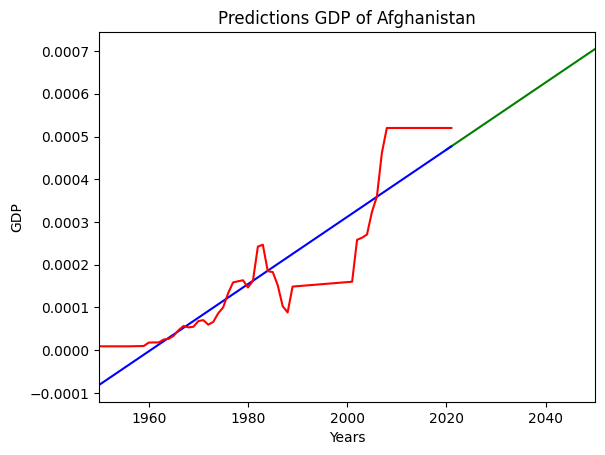

In [122]:
plt.plot(future_years.flatten(), future_predictions, color='green')
plt.plot(x, y_pred, color='blue')
plt.plot(x, y, color='red')

# we define the title and the labels of the axis 
plt.title('Predictions GDP of Afghanistan')
plt.xlabel('Years')
plt.ylabel('GDP')

plt.gca().set_xlim(1950,2050)

plt.show()

# <u> Polynomial Interpolation 

In numerical analysis, polynomial interpolation is the interpolation of a given bivariate data set by the polynomial of lowest possible degree that passes through the points of the dataset.

In [104]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
# we open and read the merge table of all indicators
silver_dataset = pd.read_csv ('./data/GoldenDataFrameWithoutCluster.csv')
silver_dataset = silver_dataset.drop(silver_dataset.columns[0], axis = 1)
silver_dataset = silver_dataset.drop(silver_dataset.columns[0], axis = 1)
silver_dataset = silver_dataset.dropna()
silver_dataset

,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
0,NOR,1831,0.000114,0.217868,5.892337e-07,0.147095,0.483624,0.096871
1,NOR,1832,0.000114,0.217868,5.182407e-07,0.147095,0.483624,0.096871
2,NOR,1833,0.000114,0.217868,5.602877e-07,0.147095,0.483624,0.096871
3,NOR,1834,0.000114,0.217868,6.143394e-07,0.147095,0.483624,0.096871
4,NOR,1835,0.000114,0.217868,6.790523e-07,0.147095,0.483624,0.096871
...,...,...,...,...,...,...,...,...
20570,HRV,2017,0.000015,0.083368,3.257590e-03,0.144623,0.887248,0.367510
20571,HRV,2018,0.000014,0.088788,3.257590e-03,0.138443,0.889933,0.367510
20572,HRV,2019,0.000014,0.088998,3.257590e-03,0.131026,0.895302,0.367510
20573,HRV,2020,0.000013,0.088308,3.257590e-03,0.101360,0.885906,0.367510


We select only one country

In [106]:
silver_dataset = silver_dataset[silver_dataset.Code == 'AFG']
silver_dataset

,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
19064,AFG,1950,0.012906,0.801027,0.000009,0.908529,0.210738,0.035952
19065,AFG,1951,0.012906,0.802407,0.000009,0.908529,0.214765,0.035952
19066,AFG,1952,0.012906,0.802469,0.000009,0.908529,0.220134,0.035952
19067,AFG,1953,0.012906,0.803220,0.000009,0.908529,0.226846,0.035952
19068,AFG,1954,0.012906,0.801742,0.000009,0.908529,0.230872,0.035952
...,...,...,...,...,...,...,...,...
19131,AFG,2017,0.006147,0.736124,0.000520,0.822002,0.684564,0.121505
19132,AFG,2018,0.005936,0.736124,0.000520,0.813350,0.685906,0.121505
19133,AFG,2019,0.005750,0.736124,0.000520,0.805933,0.692617,0.121505
19134,AFG,2020,0.005565,0.736124,0.000520,0.817058,0.679195,0.121505


In [107]:
# we choose the indicator to study
x = silver_dataset['Year']
y = silver_dataset['GDP ']

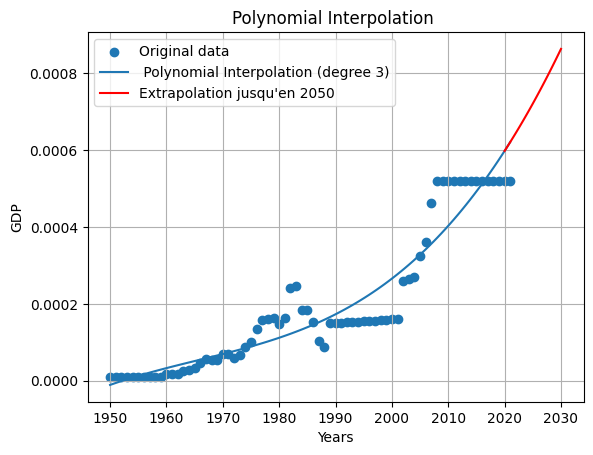

In [109]:
# Degree of teh polynome of interpolation
degre_polynome = 3

# creation of a polynome of interpolation
coefficients = np.polyfit(x, y, degre_polynome)
polynome = np.poly1d(coefficients)

# we create new points to create the polynome
annees_intermediaires = np.linspace(min(x), max(x), 100)
valeurs_interpol = polynome(annees_intermediaires)


# Extrapolation until 2030
annees_future = np.linspace(2020, 2030, 100)
valeurs_future = polynome(annees_future)


# we plot the new data
plt.scatter(x, y, label="Original data")
plt.plot(annees_intermediaires, valeurs_interpol, label=f" Polynomial Interpolation (degree {degre_polynome})")
plt.plot(annees_future, valeurs_future, label="Extrapolation until 2030", color= 'red')
plt.xlabel("Years")
plt.ylabel("GDP")
plt.title("Polynomial Interpolation ")
plt.legend()
plt.grid()
plt.show()





In [110]:
# we open and read the merge table of all indicators
silver_dataset = pd.read_csv ('./data/GoldenDataFrameWithoutCluster.csv')
silver_dataset = silver_dataset.drop(silver_dataset.columns[0], axis = 1)
silver_dataset = silver_dataset.drop(silver_dataset.columns[0], axis = 1)
silver_dataset = silver_dataset.dropna()
silver_dataset = silver_dataset[silver_dataset.Code == 'AFG']

# we choose the indicator to study
x = silver_dataset['Year']
y = silver_dataset['Deaths']

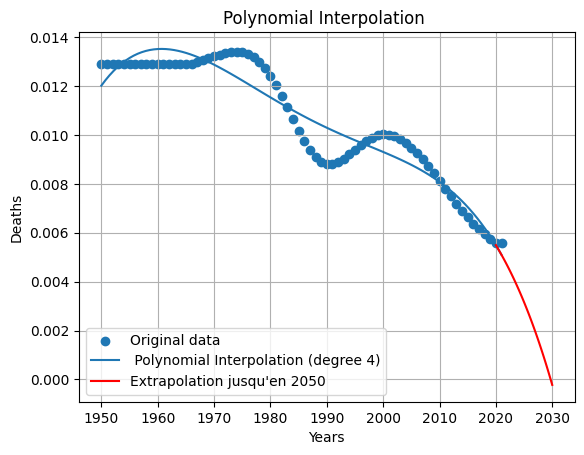

In [111]:
# Degree of teh polynome of interpolation
degre_polynome = 4

# creation of a polynome of interpolation
coefficients = np.polyfit(x, y, degre_polynome)
polynome = np.poly1d(coefficients)

# we create new points to create the polynome
annees_intermediaires = np.linspace(min(x), max(x), 100)
valeurs_interpol = polynome(annees_intermediaires)


# Extrapolation until 2030
annees_future = np.linspace(2020, 2030, 100)
valeurs_future = polynome(annees_future)


# we plot the new data
plt.scatter(x, y, label="Original data")
plt.plot(annees_intermediaires, valeurs_interpol, label=f" Polynomial Interpolation (degree {degre_polynome})")
plt.plot(annees_future, valeurs_future, label="Extrapolation until 2030", color= 'red')
plt.xlabel("Years")
plt.ylabel("Deaths")
plt.title("Polynomial Interpolation ")
plt.legend()
plt.grid()
plt.show()

# <u> PCA

Principal Component Analysis (PCA) is a dimensionality reduction method widely used in descriptive statistics to visualize data described in more dimensions on a 2D or 3D graph.

In [133]:
# we open and read the merge table of all indicators
silver_dataset = pd.read_csv ('./data/GoldenDataFrameWithoutCluster.csv')
silver_dataset = silver_dataset.drop(silver_dataset.columns[0], axis = 1)
silver_dataset = silver_dataset.drop(silver_dataset.columns[0], axis = 1)
silver_dataset = silver_dataset.dropna()
silver_dataset

,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
0,NOR,1831,0.000114,0.217868,5.892337e-07,0.147095,0.483624,0.096871
1,NOR,1832,0.000114,0.217868,5.182407e-07,0.147095,0.483624,0.096871
2,NOR,1833,0.000114,0.217868,5.602877e-07,0.147095,0.483624,0.096871
3,NOR,1834,0.000114,0.217868,6.143394e-07,0.147095,0.483624,0.096871
4,NOR,1835,0.000114,0.217868,6.790523e-07,0.147095,0.483624,0.096871
...,...,...,...,...,...,...,...,...
20570,HRV,2017,0.000015,0.083368,3.257590e-03,0.144623,0.887248,0.367510
20571,HRV,2018,0.000014,0.088788,3.257590e-03,0.138443,0.889933,0.367510
20572,HRV,2019,0.000014,0.088998,3.257590e-03,0.131026,0.895302,0.367510
20573,HRV,2020,0.000013,0.088308,3.257590e-03,0.101360,0.885906,0.367510


We select only one country

In [134]:
silver_dataset = silver_dataset[silver_dataset.Code == 'AFG']
silver_dataset = silver_dataset.drop(silver_dataset.columns[0], axis = 1)
silver_dataset

,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
19064,1950,0.012906,0.801027,0.000009,0.908529,0.210738,0.035952
19065,1951,0.012906,0.802407,0.000009,0.908529,0.214765,0.035952
19066,1952,0.012906,0.802469,0.000009,0.908529,0.220134,0.035952
19067,1953,0.012906,0.803220,0.000009,0.908529,0.226846,0.035952
19068,1954,0.012906,0.801742,0.000009,0.908529,0.230872,0.035952
...,...,...,...,...,...,...,...
19131,2017,0.006147,0.736124,0.000520,0.822002,0.684564,0.121505
19132,2018,0.005936,0.736124,0.000520,0.813350,0.685906,0.121505
19133,2019,0.005750,0.736124,0.000520,0.805933,0.692617,0.121505
19134,2020,0.005565,0.736124,0.000520,0.817058,0.679195,0.121505


Transformed data :
[[-2.38055332e-01 -3.84852670e-02]
 [-2.34372870e-01 -3.67184376e-02]
 [-2.29205236e-01 -3.59856916e-02]
 [-2.22843440e-01 -3.44540960e-02]
 [-2.18746780e-01 -3.52961037e-02]
 [-2.09828840e-01 -3.32238378e-02]
 [-2.03477757e-01 -3.16247723e-02]
 [-1.96914218e-01 -3.13638607e-02]
 [-1.89247571e-01 -2.97306051e-02]
 [-1.82898273e-01 -2.81202951e-02]
 [-1.76531114e-01 -2.66224461e-02]
 [-1.68810906e-01 -2.53265403e-02]
 [-1.63770031e-01 -2.37954001e-02]
 [-1.57474286e-01 -2.18477501e-02]
 [-1.51051788e-01 -2.06984865e-02]
 [-1.44598934e-01 -1.97403954e-02]
 [-1.38396020e-01 -1.72080153e-02]
 [-1.33548915e-01 -1.44620029e-02]
 [-1.27509525e-01 -1.09058422e-02]
 [-1.21502340e-01 -7.14724544e-03]
 [-1.15227057e-01 -5.07554133e-03]
 [-1.08786270e-01 -8.64023974e-05]
 [-1.02143564e-01  3.63198808e-03]
 [-9.44314675e-02  8.93626975e-03]
 [-8.81077479e-02  1.46672197e-02]
 [-8.00823780e-02  1.80032476e-02]
 [-7.32959792e-02  2.16183841e-02]
 [-6.54057676e-02  2.66055596e-02]
 

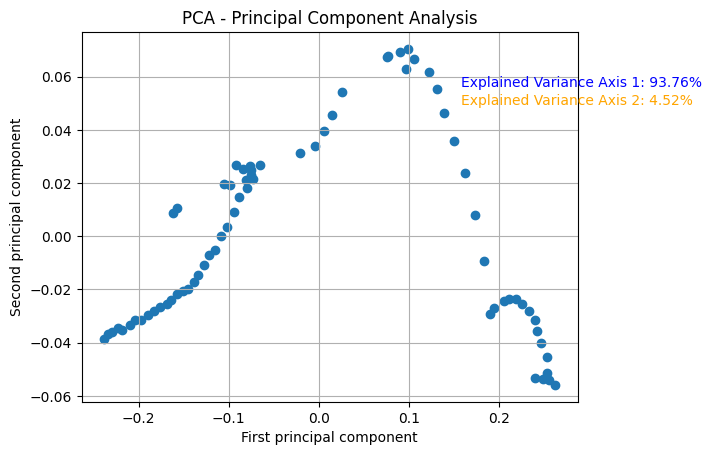

In [141]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = silver_dataset

indicators_data = df.drop('Year', axis=1)

# we create an instance of pca
num_components = 2  
pca = PCA(n_components=num_components)

# PCA fitting and transformation of the data
data_transformed = pca.fit_transform(indicators_data)

print("Transformed data :")
print(data_transformed)

plt.scatter(data_transformed[:, 0], data_transformed[:, 1])
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("PCA - Principal Component Analysis")

# Calculate the explained variance ratios
explained_variances = pca.explained_variance_ratio_

# Display the explained variances as percentages
plt.text(data_transformed[:, 0].max() * 0.6, data_transformed[:, 1].max() * 0.8,
         f'Explained Variance Axis 1: {explained_variances[0]*100:.2f}%', fontsize=10, color='blue')
plt.text(data_transformed[:, 0].max() * 0.6, data_transformed[:, 1].max() * 0.7,
         f'Explained Variance Axis 2: {explained_variances[1]*100:.2f}%', fontsize=10, color='orange')

plt.grid()
plt.show()